In [11]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay,RocCurveDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
from matplotlib import pyplot as plt

dataset link : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [2]:

dataset =  pd.read_csv("/content/drive/MyDrive/machine learning project /healthcare-dataset-stroke-data.csv")

In [3]:
dataset.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [4]:
print('dataset shape : ',dataset.shape)

dataset shape :  (5110, 12)


In [5]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
def getUniqueCountForEveryColumn(dataset):
  dict = {}
  for i in list(dataset):
    dict[i] = dataset[i].value_counts().shape[0]
  
  dataFrame = pd.DataFrame(dict, index= ['unique count']).transpose()
  return dataFrame

In [7]:
uniqueValueForEachColumn = getUniqueCountForEveryColumn(dataset)
uniqueValueForEachColumn ['unique count']

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
Name: unique count, dtype: int64

In [8]:
def plotPairplot(dataFrame,hue,height=2.5):
  return sns.pairplot(dataFrame,hue = hue,height = height)

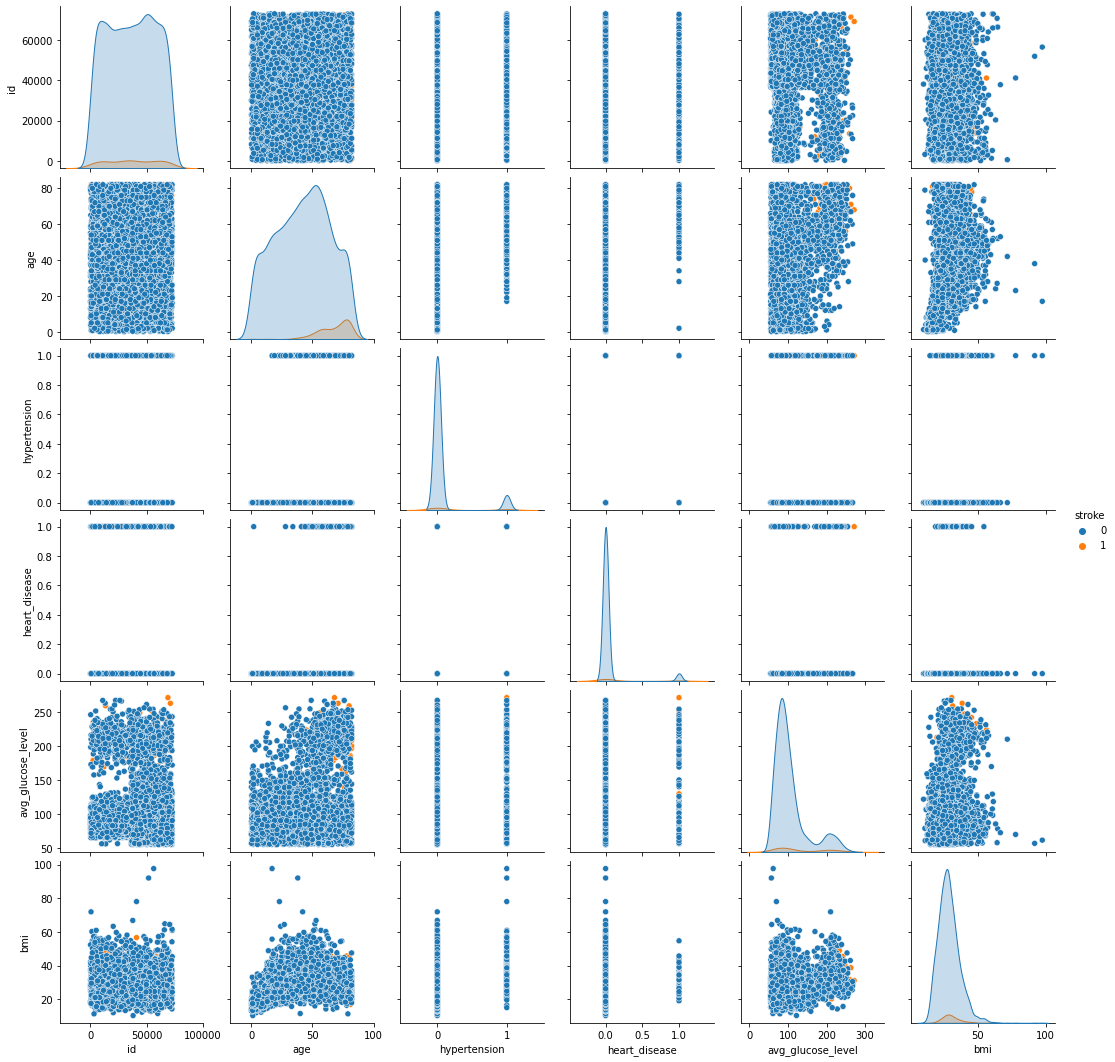

In [9]:
plotPairplot(dataset,'stroke',2.5)

In [12]:
def plotData(gridspaceX,gridSpaceY,dataset,featureColumnName,hue,continuousOrCategorical):
  fig = plt.figure(figsize=(35,25))
  gs = fig.add_gridspec(3,4)
  gs.update(wspace=0.3, hspace=0.15)
  ax1 = fig.add_subplot(gs[gridspaceX,gridSpaceY])
  background_color = "#AF7880"

  fig.patch.set_facecolor(background_color) 
  ax1.set_facecolor(background_color) 
  ax1.grid(color='#123456', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
  if continuousOrCategorical == 0:
    sns.countplot(ax=ax1, data=dataset, x=featureColumnName,palette = 'Purples', hue= hue,edgecolor='black',**{'hatch':'/','linewidth':2})
  elif continuousOrCategorical ==1:
    sns.kdeplot(ax=ax1, data=dataset, x= featureColumnName,hue=hue, fill=True,palette='Purples', alpha=.5, linewidth=0)
  elif continuousOrCategorical ==2:
    sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')


Draw categorical features(gender,hypertension,heart_disease,ever_married,work_type,Residence_type,Smoking_status,stroke)

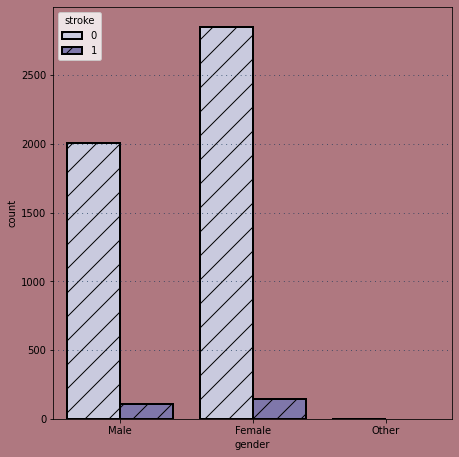

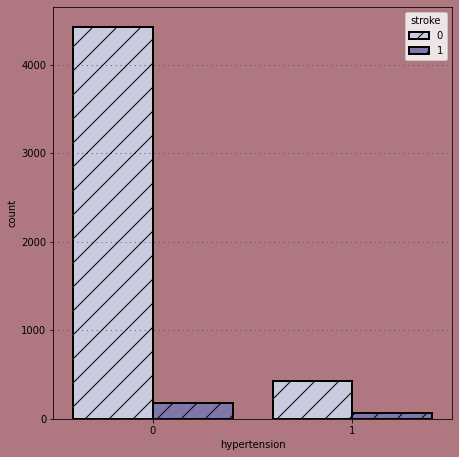

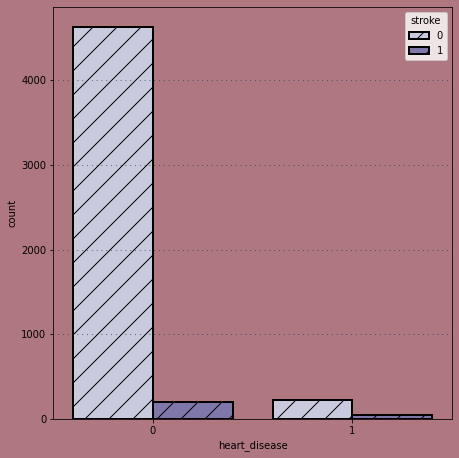

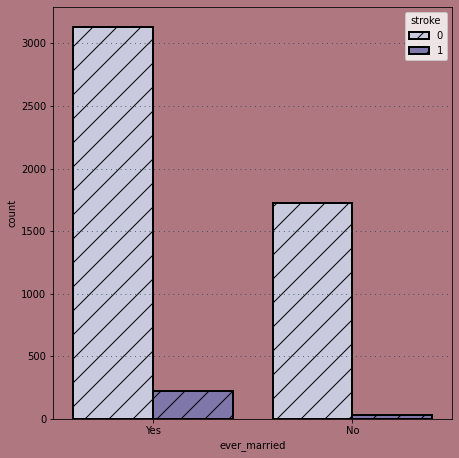

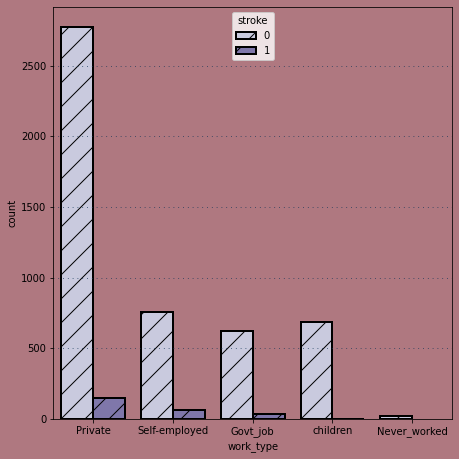

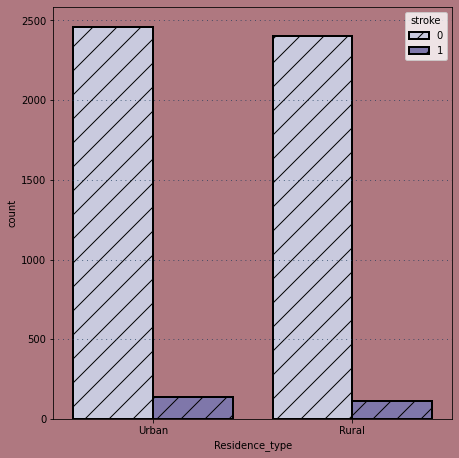

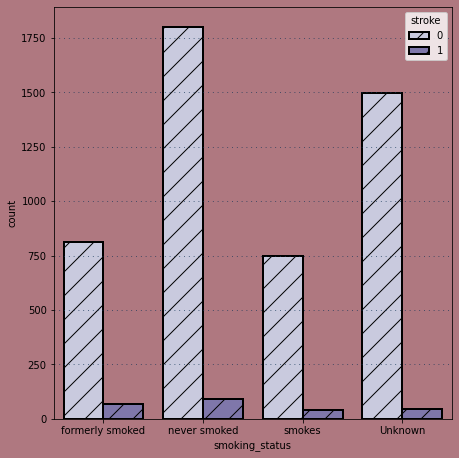

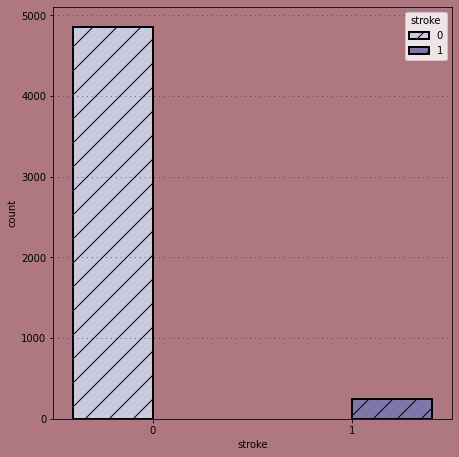

In [13]:
plotData(0,1,dataset,'gender','stroke',0)
plotData(0,1,dataset,'hypertension','stroke',0)
plotData(0,1,dataset,'heart_disease','stroke',0)
plotData(0,1,dataset,'ever_married','stroke',0)
plotData(0,1,dataset,'work_type','stroke',0)
plotData(0,1,dataset,'Residence_type','stroke',0)
plotData(0,1,dataset,'smoking_status','stroke',0)
plotData(0,1,dataset,'stroke','stroke',0)

draw continuous data(age , bmi, avg_glucose_level)

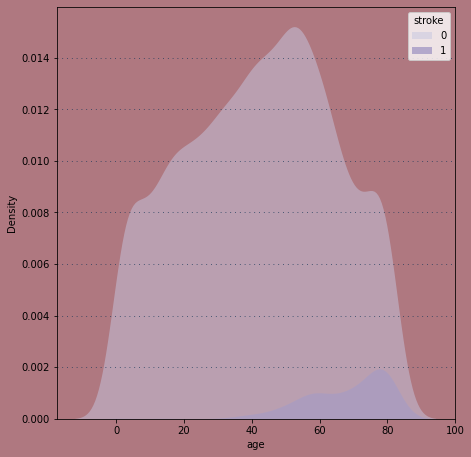

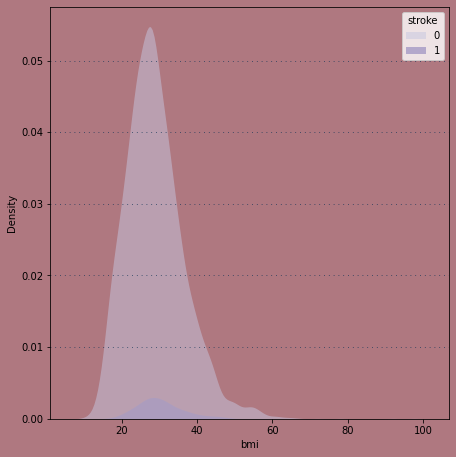

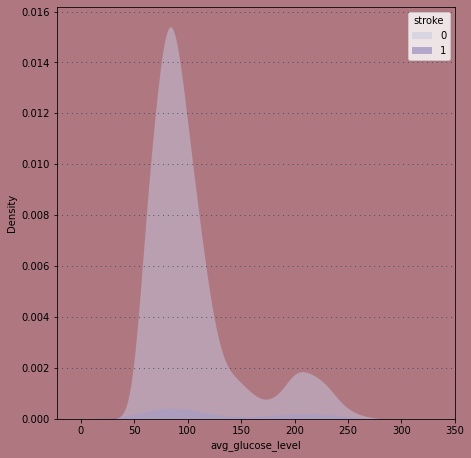

In [14]:
plotData(0,1,dataset,'age','stroke',1)
plotData(0,1,dataset,'bmi','stroke',1)
plotData(0,1,dataset,'avg_glucose_level','stroke',1)

Draw corrliation heatmap to understand the relations between the features 

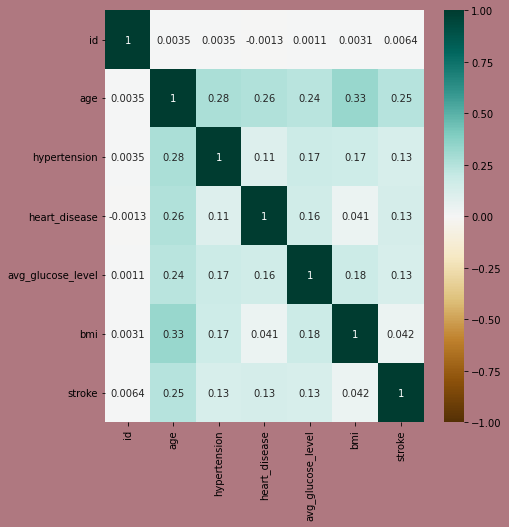

In [15]:
plotData(0,1,dataset,'stroke','stroke',2)